In [2]:
from google.colab import files
uploaded = files.upload()

Saving Austin_self_management.csv to Austin_self_management.csv


In [4]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['Austin_self_management.csv']))

In [5]:
#df shows the first 5 and last 5 observations of the dataset
df

,Class,Class Language,Age,Year,Gender,Insurance Category,Medical Home Category,Race/Ethnicity,Education Level,Diabetes Status (Yes/No),Heart Disease (Yes/No),High Blood Pressure (Yes/No),Tobacco Use (Yes/No),Previous Diabetes Education (Yes/No),Diabetes Knowledge,Fruits & Vegetable Consumption,Sugar-Sweetened Beverage Consumption,Food Measurement,Carbohydrate Counting,Exercise,Problem Area in Diabetes (PAID) Scale Score,ZIP code (address),ZIP code (city),ZIP code (state),ZIP code (zip)
0,APH,English,47.0,2016,F,Private insurance,Doctor's Office,American Indian,College,Yes,No,No,No,Yes,NaN,3-4,0,0 days,0 days,1 day,13.75,NaN,NaN,NaN,78741.0
1,PCHW,Spanish,35.0,2015,F,Other,NaN,Hispanic/Latino,NaN,No,No,No,No,No,Fair,1-2,2,I don't know how,I don't know how,1 day,NaN,NaN,NaN,NaN,78758.0
2,ARCF,English,58.0,2015,F,MediCARE,NaN,Black/African American,1-8,NaN,No,Yes,No,No,Fair,1-2,NaN,NaN,NaN,0 days,NaN,NaN,NaN,NaN,78753.0
3,PCHW,Spanish,41.0,2015,F,None,No regular place of care,Hispanic/Latino,NaN,No,No,Yes,No,No,NaN,1-2,2,I don't know how,I don't know how,4 days,NaN,NaN,NaN,NaN,78617.0
4,ARCF,English,56.0,2015,M,None,Emergency Room,NaN,College,No,No,No,No,No,NaN,1-2,1,0 days,0 days,0 days,NaN,NaN,NaN,NaN,78720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,EB,Spanish,43.0,2017,F,None,NaN,Hispanic/Latino,9-11,No,No,No,No,Yes,Fair,1-2,1,0 days,0 days,5 or more days,NaN,NaN,NaN,NaN,NaN
1684,ARCF,English,41.0,2017,M,Other,People's Community Clinic,Asian,Some College,Yes,No,No,No,Yes,Fair,3-4,1,0 days,0 days,2 days,48.75,NaN,NaN,NaN,78723.0
1685,ARCF,English,49.0,2016,F,Private insurance,Doctor's Office,Hispanic/Latino,Some College,No,No,Yes,NaN,No,Poor,NaN,0,0 days,0 days,0 days,NaN,NaN,NaN,NaN,78748.0
1686,EB,Spanish,27.0,2015,F,Other,Lone Star Circle of Care,Hispanic/Latino,High School GED,Yes,No,No,No,No,Fair,3-4,1,1-3,1-3,3 days,31.25,NaN,NaN,NaN,78724.0


# **POTENTIAL DV/IV**

In [6]:
#Here we see a list of all the columns currently in the dataset
#Potential dependent variables can be Class, Class Language, Year, Gender, Insurance Category, ZIP Code (ZIP) etc...
#Potential indepedent variables can be Class, Class Language, Year, Gender, Insurance Category, ZIP Code (ZIP) etc...
#The DV and IV will change depending on what kind of question we want answered from this dataset
#Ex: to find the relationship between 'Age' and 'Diabetes Knowledge', the DV will be Diabetes Knowledge while the IV will be Age
#More information regarding DV/IV will be explained in the Visualizations section 
for col in df.columns: 
    print(col)

Class
Class Language
Age
Year
Gender
Insurance Category
Medical Home Category
Race/Ethnicity
Education Level
Diabetes Status (Yes/No)
Heart Disease (Yes/No)
High Blood Pressure (Yes/No)
Tobacco Use (Yes/No)
Previous Diabetes Education (Yes/No)
Diabetes Knowledge
Fruits & Vegetable Consumption
Sugar-Sweetened Beverage Consumption
Food Measurement
Carbohydrate Counting
Exercise
Problem Area in Diabetes (PAID) Scale Score
ZIP code (address)
ZIP code (city)
ZIP code (state)
ZIP code (zip)


# **MISSING DATA**

In [7]:
#MISSING DATA
#df.isnull() returns all the columns with missing data
df.isnull()

,Class,Class Language,Age,Year,Gender,Insurance Category,Medical Home Category,Race/Ethnicity,Education Level,Diabetes Status (Yes/No),Heart Disease (Yes/No),High Blood Pressure (Yes/No),Tobacco Use (Yes/No),Previous Diabetes Education (Yes/No),Diabetes Knowledge,Fruits & Vegetable Consumption,Sugar-Sweetened Beverage Consumption,Food Measurement,Carbohydrate Counting,Exercise,Problem Area in Diabetes (PAID) Scale Score,ZIP code (address),ZIP code (city),ZIP code (state),ZIP code (zip)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False
2,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,True,False,True,True,True,True,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
1684,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False
1685,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,True,True,True,False
1686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False


In [8]:
#MISSING DATA
#df.isna().sum() shows the number of missing values per column
#Based on the info below, all the participants seems to have filled out class language and year
#There are no data for the ZIP code address, city, and state column since total NaN is 1688, and the total number of observations is 1688
df.isna().sum()

Class                                             0
Class Language                                    0
Age                                              32
Year                                              0
Gender                                           37
Insurance Category                              113
Medical Home Category                            91
Race/Ethnicity                                   37
Education Level                                 289
Diabetes Status (Yes/No)                         30
Heart Disease (Yes/No)                          100
High Blood Pressure (Yes/No)                     93
Tobacco Use (Yes/No)                            124
Previous Diabetes Education (Yes/No)            125
Diabetes Knowledge                              154
Fruits & Vegetable Consumption                   52
Sugar-Sweetened Beverage Consumption             53
Food Measurement                                 63
Carbohydrate Counting                            66
Exercise    

In [9]:
#MISSING DATA
#Since the features Zip code (address), (city), and (state) does not provide any data, they will be deleted
df.drop(['ZIP code (address)', 'ZIP code (city)','ZIP code (state)'], axis=1, inplace=True)

In [10]:
#MISSING DATA
#after running df.dtypes, you can see that the zip code address, city, and state column has been deleted
df.dtypes

Class                                           object
Class Language                                  object
Age                                            float64
Year                                             int64
Gender                                          object
Insurance Category                              object
Medical Home Category                           object
Race/Ethnicity                                  object
Education Level                                 object
Diabetes Status (Yes/No)                        object
Heart Disease (Yes/No)                          object
High Blood Pressure (Yes/No)                    object
Tobacco Use (Yes/No)                            object
Previous Diabetes Education (Yes/No)            object
Diabetes Knowledge                              object
Fruits & Vegetable Consumption                  object
Sugar-Sweetened Beverage Consumption            object
Food Measurement                                object
Carbohydra

In [11]:
#MISSING VALUES
#For the missing data in Age, we will delete the observations/rows
df.dropna(subset = ['Age'], inplace=True)

In [12]:
#MISSING VALUES
#For the rest of the data that offers categorical variables, we will fill in the missing data with 'No Data'
df = df.fillna('No data')

In [13]:
#MISSING VALUES
#Since filling in the NaN values of 'PAID Scale Score' with a str will affect the data analysis, we are replacing 'No data' back with NaN
import numpy as np
df['Problem Area in Diabetes (PAID) Scale Score'] = df['Problem Area in Diabetes (PAID) Scale Score'].replace('No data', np.nan)


In [14]:
#MISSING VALUES
#You can see the changes to the NaN values below:
df

,Class,Class Language,Age,Year,Gender,Insurance Category,Medical Home Category,Race/Ethnicity,Education Level,Diabetes Status (Yes/No),Heart Disease (Yes/No),High Blood Pressure (Yes/No),Tobacco Use (Yes/No),Previous Diabetes Education (Yes/No),Diabetes Knowledge,Fruits & Vegetable Consumption,Sugar-Sweetened Beverage Consumption,Food Measurement,Carbohydrate Counting,Exercise,Problem Area in Diabetes (PAID) Scale Score,ZIP code (zip)
0,APH,English,47.0,2016,F,Private insurance,Doctor's Office,American Indian,College,Yes,No,No,No,Yes,No data,3-4,0,0 days,0 days,1 day,13.75,78741
1,PCHW,Spanish,35.0,2015,F,Other,No data,Hispanic/Latino,No data,No,No,No,No,No,Fair,1-2,2,I don't know how,I don't know how,1 day,NaN,78758
2,ARCF,English,58.0,2015,F,MediCARE,No data,Black/African American,1-8,No data,No,Yes,No,No,Fair,1-2,No data,No data,No data,0 days,NaN,78753
3,PCHW,Spanish,41.0,2015,F,None,No regular place of care,Hispanic/Latino,No data,No,No,Yes,No,No,No data,1-2,2,I don't know how,I don't know how,4 days,NaN,78617
4,ARCF,English,56.0,2015,M,None,Emergency Room,No data,College,No,No,No,No,No,No data,1-2,1,0 days,0 days,0 days,NaN,78720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,EB,Spanish,43.0,2017,F,None,No data,Hispanic/Latino,9-11,No,No,No,No,Yes,Fair,1-2,1,0 days,0 days,5 or more days,NaN,No data
1684,ARCF,English,41.0,2017,M,Other,People's Community Clinic,Asian,Some College,Yes,No,No,No,Yes,Fair,3-4,1,0 days,0 days,2 days,48.75,78723
1685,ARCF,English,49.0,2016,F,Private insurance,Doctor's Office,Hispanic/Latino,Some College,No,No,Yes,No data,No,Poor,No data,0,0 days,0 days,0 days,NaN,78748
1686,EB,Spanish,27.0,2015,F,Other,Lone Star Circle of Care,Hispanic/Latino,High School GED,Yes,No,No,No,No,Fair,3-4,1,1-3,1-3,3 days,31.25,78724


In [15]:
#MISSING VALUES
#There are no longer any missing data besides in PAID Scale Score
df.isna().sum()

Class                                             0
Class Language                                    0
Age                                               0
Year                                              0
Gender                                            0
Insurance Category                                0
Medical Home Category                             0
Race/Ethnicity                                    0
Education Level                                   0
Diabetes Status (Yes/No)                          0
Heart Disease (Yes/No)                            0
High Blood Pressure (Yes/No)                      0
Tobacco Use (Yes/No)                              0
Previous Diabetes Education (Yes/No)              0
Diabetes Knowledge                                0
Fruits & Vegetable Consumption                    0
Sugar-Sweetened Beverage Consumption              0
Food Measurement                                  0
Carbohydrate Counting                             0
Exercise    

# **TRANSFORMATION**

In [16]:
#df.dtypes shows the datatype of each feature
df.dtypes

Class                                           object
Class Language                                  object
Age                                            float64
Year                                             int64
Gender                                          object
Insurance Category                              object
Medical Home Category                           object
Race/Ethnicity                                  object
Education Level                                 object
Diabetes Status (Yes/No)                        object
Heart Disease (Yes/No)                          object
High Blood Pressure (Yes/No)                    object
Tobacco Use (Yes/No)                            object
Previous Diabetes Education (Yes/No)            object
Diabetes Knowledge                              object
Fruits & Vegetable Consumption                  object
Sugar-Sweetened Beverage Consumption            object
Food Measurement                                object
Carbohydra

In [17]:
#TRANSFORMATION
#Currently 'ZIP code (zip)' is a float64
#but it can be used as an categorical object, so we will change it to object
df['ZIP code (zip)'] = df['ZIP code (zip)'].astype(str)
df['ZIP code (zip)']

0       78741.0
1       78758.0
2       78753.0
3       78617.0
4       78720.0
         ...   
1683    No data
1684    78723.0
1685    78748.0
1686    78724.0
1687    78724.0
Name: ZIP code (zip), Length: 1656, dtype: object

In [18]:
#TRANSFORMATION
#We saw from the previous output above that there are decimals after the ZIP code
#We will delete the zip code decimals using str.split()
df['ZIP code (zip)'] = df['ZIP code (zip)'].str.split('.').str[0]
df['ZIP code (zip)']

0         78741
1         78758
2         78753
3         78617
4         78720
         ...   
1683    No data
1684      78723
1685      78748
1686      78724
1687      78724
Name: ZIP code (zip), Length: 1656, dtype: object

In [19]:
#TRANSFORMATION
#Since 'Age' is also a float but can be used as an int, we will convert it to an int
df['Age'] = df['Age'].astype(int)
df['Age']

0       47
1       35
2       58
3       41
4       56
        ..
1683    43
1684    41
1685    49
1686    27
1687    58
Name: Age, Length: 1656, dtype: int64

In [20]:
#We see here that 'Age' is changed to int64 and 'ZIP code (zip)' is changed to object
df.dtypes

Class                                           object
Class Language                                  object
Age                                              int64
Year                                             int64
Gender                                          object
Insurance Category                              object
Medical Home Category                           object
Race/Ethnicity                                  object
Education Level                                 object
Diabetes Status (Yes/No)                        object
Heart Disease (Yes/No)                          object
High Blood Pressure (Yes/No)                    object
Tobacco Use (Yes/No)                            object
Previous Diabetes Education (Yes/No)            object
Diabetes Knowledge                              object
Fruits & Vegetable Consumption                  object
Sugar-Sweetened Beverage Consumption            object
Food Measurement                                object
Carbohydra

In [21]:
#TRANSFORMATION
#In 'Carbohydrate Counting', there are certain data that includes 1-3, or 4 or more but doesn't specify 1-3/4 or more of what
#On the other hand, there is 0 days, which means this column pertains to the amount of days that the participants count their carbs
#To make the data consistent throughout this column, we will add "days" to the end of 1-3 or 4 or more
#To make the response 'I don't know how' shorter, we will change it to 'IDK how'
def addingdaystoCarbCount(row):
  if row['Carbohydrate Counting'] == '1-3' : return '1-3 days'
  elif row['Carbohydrate Counting'] == '0 days' : return '0 days'
  elif row['Carbohydrate Counting'] == "I don't know how" : return 'IDK how'
  elif row['Carbohydrate Counting'] == '4 or more' : return '4 or more days'

df['Carbohydrate Counting'] = df.apply( lambda row : addingdaystoCarbCount(row), axis = 1)
df['Carbohydrate Counting']

0         0 days
1        IDK how
2           None
3        IDK how
4         0 days
          ...   
1683      0 days
1684      0 days
1685      0 days
1686    1-3 days
1687      0 days
Name: Carbohydrate Counting, Length: 1656, dtype: object

In [22]:
#TRANSFORMATION
#We will do the same for the feature, 'Food Measurement'
def addingdaystoFoodMeasure(row):
  if row['Food Measurement'] == '1-3' : return '1-3 days'
  elif row['Food Measurement'] == '0 days' : return '0 days'
  elif row['Food Measurement'] == "I don't know how" : return 'IDK how'
  elif row['Food Measurement'] == '4 or more' : return '4 or more days'

df['Food Measurement'] = df.apply( lambda row : addingdaystoFoodMeasure(row), axis = 1)
df['Food Measurement']

0         0 days
1        IDK how
2           None
3        IDK how
4         0 days
          ...   
1683      0 days
1684      0 days
1685      0 days
1686    1-3 days
1687      0 days
Name: Food Measurement, Length: 1656, dtype: object

In [23]:
#TRANSFORMATION
#We will do the same for the feature, 'Fruits & Vegetable Consumption'
def addingdaystoFoodVeggies(row):
  if row['Fruits & Vegetable Consumption'] == '1-2' : return '1-2 days'
  elif row['Fruits & Vegetable Consumption'] == '3-4' : return '3-4 days'
  elif row['Fruits & Vegetable Consumption'] == '0' : return '0 days'
  elif row['Fruits & Vegetable Consumption'] == "Not sure" : return 'Not Sure'
  elif row['Fruits & Vegetable Consumption'] == '5 or more' : return '4 or more days'

df['Fruits & Vegetable Consumption'] = df.apply( lambda row : addingdaystoFoodVeggies(row), axis = 1)
df['Fruits & Vegetable Consumption']

0       3-4 days
1       1-2 days
2       1-2 days
3       1-2 days
4       1-2 days
          ...   
1683    1-2 days
1684    3-4 days
1685        None
1686    3-4 days
1687    1-2 days
Name: Fruits & Vegetable Consumption, Length: 1656, dtype: object

# **VALUE COUNTS**

In [24]:
#VALUE COUNTS
#Here we see the counts of all the Ages
#The age range is 76
df['Age'].value_counts()

37    45
36    44
42    44
52    44
58    44
      ..
87     2
89     2
91     1
88     1
93     1
Name: Age, Length: 75, dtype: int64

In [25]:
#VALUE COUNTS
#Here we see the counts of all the ZIP codes
#Based on the data there seems to be the most participants from ZIP code 78744 and 78745
df['ZIP code (zip)'].value_counts()

No data    162
78745      134
78744      134
78753      123
78724      113
          ... 
78140        1
78641        1
78642        1
78713        1
78102        1
Name: ZIP code (zip), Length: 86, dtype: int64

In [26]:
#VALUE COUNTS
#Here we see the counts of the class language
#Based on the data there seems to me the most participants in Spanish diabetes self-management courses
df['Class Language'].value_counts()

Spanish            999
English            625
Chinese/English     32
Name: Class Language, dtype: int64

In [27]:
#VALUE COUNTS
#Here we see the counts of the class language
#Based on the data most participants filled out that they do not have health insurance
df['Insurance Category'].value_counts()

None                 450
Other                282
Private insurance    263
MAP                  192
MediCARE             189
Medicaid             174
No data              106
Name: Insurance Category, dtype: int64

In [28]:
#VALUE COUNTS of Gender shows "f" value
df['Gender'].value_counts()

F          1312
M           311
No data      32
f             1
Name: Gender, dtype: int64

In [29]:
#VALUE COUNTS
#replaced "f" with "F" to bring consistency to observations in this feature
df['Gender'].replace('f', 'F', inplace = True)

In [30]:
#no longer see "f" value
df['Gender'].value_counts()

F          1313
M           311
No data      32
Name: Gender, dtype: int64

In [31]:
#want to get rid of "unknown" since it will not bring about information 
df['Race/Ethnicity'].value_counts()

Hispanic/Latino           1102
Black/African American     317
White                      131
Asian                       54
No data                     36
Other                        9
American Indian              6
Unknown                      1
Name: Race/Ethnicity, dtype: int64

In [32]:
#VALUE COUNTS
#For the Unknown value in Race/Ethnicity, we will delete the observation
#df.dropna(subset = ['Age'], inplace=True)
df = df[df['Race/Ethnicity'] != 'Unknown']

In [33]:
#The observation containing 'Unknown' is dropped from the Race/Ethnicity column
df['Race/Ethnicity'].value_counts()

Hispanic/Latino           1102
Black/African American     317
White                      131
Asian                       54
No data                     36
Other                        9
American Indian              6
Name: Race/Ethnicity, dtype: int64

In [34]:
#VALUE COUNTS
#we will do the same with all the observations that contain "unknown"
df = df[df['Diabetes Status (Yes/No)'] != 'Unknown']
df = df[df['Heart Disease (Yes/No)'] != 'Unknown']

In [35]:
#Values 'n' 'y' and 'none' does not bring forth good information to the data analysis
df['Education Level'].value_counts()

1-8                339
High School GED    282
No data            274
College            271
9-11               255
Some College       218
n                    2
y                    2
none                 1
Name: Education Level, dtype: int64

In [36]:
#VALUE COUNTS
#To prevent outliers, data that does not bring information, and ambiguity to the results, we will delete observations with "y", "n", "none"
df = df[df['Education Level'] != 'n']
df = df[df['Education Level'] != 'y']
df = df[df['Education Level'] != 'none']

In [37]:
#Updated current total observations and features
df.shape

(1639, 22)

# **CENTRAL TENDENCY AND DISTRIBUTION OF RESPONSES/QUARTILE RANGES**

In [60]:
#CENTRAL TENDENCY AND DISTRIBUTION OF RESPONSES / QUARTILE RANGES
#Below shows the mean, median, and mode of Age, Year and PAID scores
#It also shows the quartile ranges at 25%, 50%, 75%
df.describe()

,Age,Year,Problem Area in Diabetes (PAID) Scale Score
count,1639.000000,1639.000000,620.000000
mean,49.322148,2016.033557,44.346774
std,15.219274,0.772369,27.366796
min,16.000000,2015.000000,0.000000
25%,37.000000,2015.000000,21.250000
50%,49.000000,2016.000000,41.250000
75%,60.000000,2017.000000,67.500000
max,93.000000,2017.000000,100.000000


In [61]:
#CENTRAL TENDENCY AND DISTRIBUTION OF RESPONSES
#Here we can find the mean value of all the numeric variables by class language
df_language = df.groupby(['Class Language'])
df_language.mean()

,Age,Year,Problem Area in Diabetes (PAID) Scale Score
Class Language,,,
Chinese/English,64.031250,2016.000000,42.083333
English,57.022544,2016.014493,33.874598
Spanish,43.994929,2016.046653,55.140264


In [62]:
#CENTRAL TENDENCY AND DISTRIBUTION OF RESPONSES
#Here we can find the central tendency for Age, Year, and PAID Scores grouped by class language
df_language.describe()

Age                        ... Problem Area in Diabetes (PAID) Scale Score               
                 count       mean        std  ...                                         50%     75%    max
Class Language                                ...                                                           
Chinese/English   32.0  64.031250  22.515205  ...                                      40.625  51.875   77.5
English          621.0  57.022544  14.701310  ...                                      31.250  48.750   95.0
Spanish          986.0  43.994929  12.663588  ...                                      57.500  81.250  100.0

[3 rows x 24 columns]

In [63]:
#CENTRAL TENDENCY AND DISTRIBUTION OF RESPONSES
#Here we can find the mean value of all the numeric variables by year
#An interesting information we find is that when grouped by year, the average age of participants through the 3 year period is 49
df_year = df.groupby(['Year'])
df_year.mean()

,Age,Problem Area in Diabetes (PAID) Scale Score
Year,,
2015,48.844156,43.314607
2016,48.740909,45.368664
2017,50.491296,44.177778


In [64]:
#CENTRAL TENDENCY AND DISTRIBUTION OF RESPONSES
#Some college or having college leveled education leads to lower PAID Scale Scores
df.groupby(['Education Level'])['Problem Area in Diabetes (PAID) Scale Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Education Level,,,,,,,,
1-8,139.0,55.368705,27.237903,0.0,33.7500,56.250,80.0000,98.75
9-11,76.0,56.332237,27.577418,0.0,37.1875,60.625,80.0000,100.00
College,108.0,33.888889,22.776298,0.0,15.0000,32.500,47.8125,96.25
High School GED,110.0,40.068182,23.358271,0.0,23.7500,38.750,54.6875,95.00
No data,87.0,45.545977,29.703416,0.0,18.7500,42.500,73.1250,100.00
Some College,100.0,34.875000,25.144469,0.0,16.2500,30.000,50.0000,95.00


In [65]:
#CENTRAL TENDENCY AND DISTRIBUTION OF RESPONSES
#Good diabetes knowledge tends to lead to 1-3 days of food measurement
df.groupby(['Diabetes Knowledge'])['Food Measurement'].describe()

,count,unique,top,freq
Diabetes Knowledge,,,,
Fair,661,4,0 days,319
Good,387,4,1-3 days,138
No data,100,4,IDK how,34
Poor,325,4,0 days,175


In [66]:
#CENTRAL TENDENCY AND DISTRIBUTION OF RESPONSES
#Good diabetes knowledge tends to lead to 2 days of exercise
df.groupby(['Diabetes Knowledge'])['Exercise'].describe()

,count,unique,top,freq
Diabetes Knowledge,,,,
Fair,726,8,0 days,190
Good,425,8,2 days,86
No data,141,8,No data,40
Poor,347,8,0 days,99


In [67]:
#Creating a new feature called Age Group
#Child = 0-20, Adult = 21-44, Older Adult = 45-100
AgeGroups = df

bins= [0,21,44,100]
labels = ['Child','Adult','Older Adult']
AgeGroups['AgeGroup'] = pd.cut(AgeGroups['Age'], bins=bins, labels=labels, right=False)
print (AgeGroups)

     Class Class Language  ...  ZIP code (zip)     AgeGroup
0      APH        English  ...           78741  Older Adult
1     PCHW        Spanish  ...           78758        Adult
2     ARCF        English  ...           78753  Older Adult
3     PCHW        Spanish  ...           78617        Adult
4     ARCF        English  ...           78720  Older Adult
...    ...            ...  ...             ...          ...
1683    EB        Spanish  ...         No data        Adult
1684  ARCF        English  ...           78723        Adult
1685  ARCF        English  ...           78748  Older Adult
1686    EB        Spanish  ...           78724        Adult
1687  PCHW        Spanish  ...           78724  Older Adult

[1639 rows x 23 columns]


In [68]:
#CENTRAL TENDENCY AND DISTRIBUTION OF RESPONSES
#When grouped by age, it appears that most age groups have a fair knowledge in diabetes
df.groupby(['AgeGroup'])['Diabetes Knowledge'].describe()

,count,unique,top,freq
AgeGroup,,,,
Child,15,3,Fair,9
Adult,636,4,Fair,287
Older Adult,988,4,Fair,430


In [69]:
#CENTRAL TENDENCY AND DISTRIBUTION OF RESPONSES
#When grouped by age, adults aged 21-44 tend to experience emotional distress due to diabetes as compared to older adults
#Suggests that in the teaching curriculm, there should be an emphasis on emotional wellbeing
df.groupby(['AgeGroup'])['Problem Area in Diabetes (PAID) Scale Score'].describe()


,count,mean,std,min,25%,50%,75%,max
AgeGroup,,,,,,,,
Child,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adult,139.0,50.575540,27.591361,0.0,28.75,48.75,74.375,96.25
Older Adult,481.0,42.546778,27.064216,0.0,20.00,38.75,66.250,100.00


# **VISUALIZATIONS**

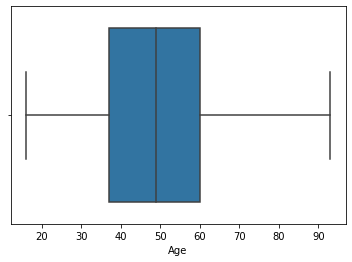

In [48]:
#VISUALIZATIONS
#Box Plot showing distribution of Age 
#Here we see that the age is between 16 to 93, with most of the participants being in the age range of 36 to 60
#We also notice that there aren't any outliers
import seaborn as sns
sns.boxplot(x=df['Age'])

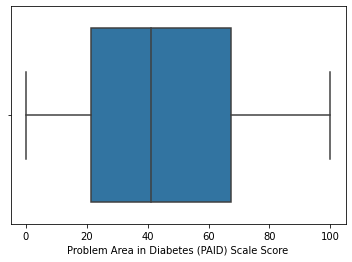

In [49]:
#VISUALIZATIONS
#Box plot showing distribution of PAID Scale Score
#Here, we see that the median is around 41 with most participants between the scores of approximately 20 to 68
#Likewise in the box plot above, there aren't any identified outliers
import seaborn as sns
sns.boxplot(x=df['Problem Area in Diabetes (PAID) Scale Score'])

Text(0.5, 1.0, 'PAID Scores by Age from 2015-2017')

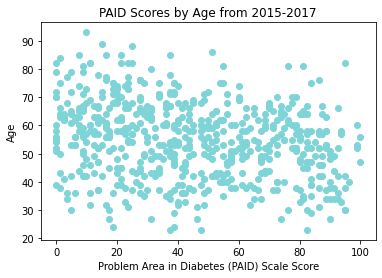

In [50]:
#VISUALIZATIONS
#Scatterplot showing the distribution of PAID scores by age
#Here, the DV = Age while the IV = PAID Scale Score
import matplotlib.pyplot as plt 
import numpy as np
plt.scatter(df['Problem Area in Diabetes (PAID) Scale Score'], df['Age'], color='#7FD4D7')
plt.ylabel('Age')
plt.xlabel('Problem Area in Diabetes (PAID) Scale Score')
plt.title('PAID Scores by Age from 2015-2017')

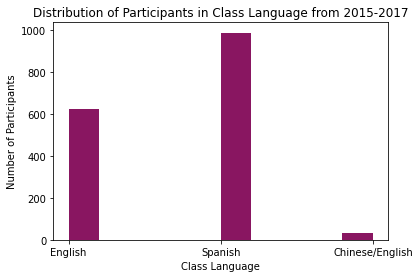

In [51]:
#VISUALIZATIONS
#Histogram showing the frequency of participants per Class Language
#Here, the DV is Number of Participants and the IV is Class Language

plt.hist(df['Class Language'], color='#891661')
plt.ylabel('Number of Participants')
plt.xlabel('Class Language')
plt.title('Distribution of Participants in Class Language from 2015-2017')
plt.show()

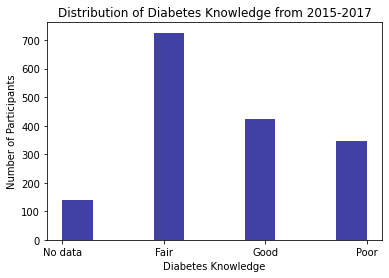

In [52]:
#VISUALIZATIONS
#Histogram showing the frequency of participants per Class Language
#Here, DV = Number of Participants and IV = Diabetes Knowledge
plt.hist(df['Diabetes Knowledge'], color='#4040A5')
plt.ylabel('Number of Participants')
plt.xlabel('Diabetes Knowledge')
plt.title('Distribution of Diabetes Knowledge from 2015-2017')
plt.show()

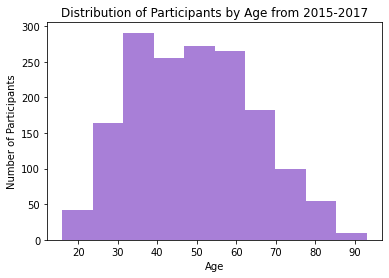

In [53]:
#VISUALIZATIONS
#Histogram showing the number of participants by age
#Here, DV = Number of Participants and IV = Age
plt.hist(df['Age'], color='#A87FD7')
plt.ylabel('Number of Participants')
plt.xlabel('Age')
plt.title('Distribution of Participants by Age from 2015-2017')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


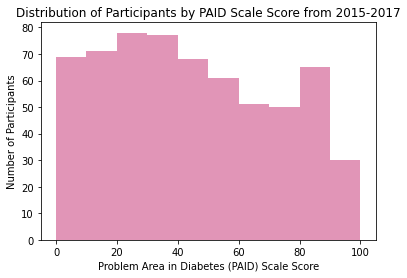

In [54]:
#VISUALIZATIONS
#Histogram showing the number of participants per PAID Scale Score
#Here, DV = Number of Participants and IV = PAID Scale Score
plt.hist(df['Problem Area in Diabetes (PAID) Scale Score'], color='#E195B7')
plt.ylabel('Number of Participants')
plt.xlabel('Problem Area in Diabetes (PAID) Scale Score')
plt.title('Distribution of Participants by PAID Scale Score from 2015-2017')
plt.show()

In [55]:
#VISUALIZATIONS
#Pie Chart showing participants distributed by year
import plotly.express as px
fig = px.pie(df, names = 'Year' , title='Participants from 2015-2017')
fig.show()

In [56]:
#VISUALIZATIONS
#Pie chart showing ZIP code distribution for participants
fig = px.pie(df, names = 'ZIP code (zip)' , title='ZIP Code of Participants from 2015-2017')
fig.show()

In [57]:
#VISUALIZATIONS
#Pie chart showing the distribution of insurance category
fig = px.pie(df, names = 'Education Level' , title='Education Level of Participants from 2015-2017')
fig.show()

In [58]:
#VISUALIZATIONS
#Pie chart showing distribution of class language from 2015-2017
fig = px.pie(df, names = 'Class Language' , title='Class Language from 2015-2017')
fig.show()

In [59]:
fig = px.pie(df, names = 'AgeGroup' , title='Age Group of Participants from 2015-2017')
fig.show()